In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
flint_mdeq = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-11-04/flint_mdeq.csv")
flint_vt = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-11-04/flint_vt.csv")

flint_vt["source"] = "vt"

flint_mdeq = flint_mdeq[["sample", "lead2"]].rename(columns={"lead2": "lead"})
flint_mdeq["source"] = "mdeq"

flint = pd.concat([flint_mdeq, flint_vt], ignore_index=True)

flint["lead_log"] = np.log(flint["lead"] + 1)

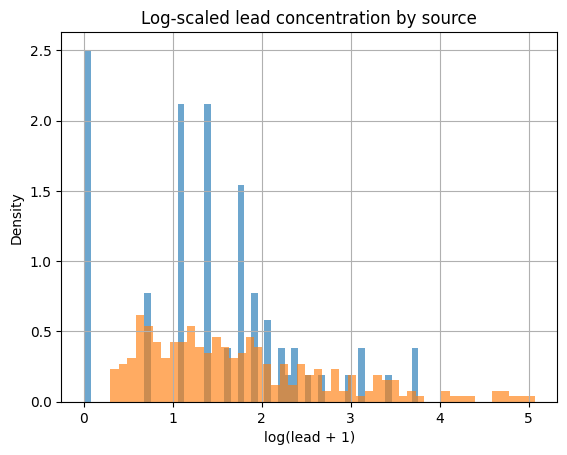

In [33]:
flint.groupby('source')["lead_log"].hist(bins=50, alpha=0.65, density=True)
plt.xlabel("log(lead + 1)")
plt.ylabel("Density")
plt.title("Log-scaled lead concentration by source")

plt.savefig(
    "2025_week44_leadinflintwater.png",
    dpi=300,
    bbox_inches="tight",
)